In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import date

# Import danych

Na początku trzeba importować dane w jupyter notebook

In [29]:
file_path = "E:\\NOKIA\\Cell_Phones_&_Accessories.txt"

Za pomocą regex można "wyłapać" odpowiednie wiersze i dodać je do odpowiednich list

In [30]:
file = open(file_path, 'r')
Lines = file.readlines()

data = {"productId" : [], "title": [], 
        "price": [], "userId": [], 
        "profileName": [], "helpfulness": [], 
        "score": [], "time": [], 
        "summary": [], "text": []}

productId = []
title = []
price = []
userId = []
profileName = []
helpfulness = []
score = []
time = []
summary = []
test = []

for line in Lines:
 
    if re.search("^product/productId", line):
        productId.append(re.findall("\:+\s(.*)",line)[0])
    
    elif re.search("^product/title", line):
        title.append(re.findall("\:+\s(.*)",line)[0])
        
    elif re.search("^product/price", line):
        price.append(re.findall("\:+\s(.*)",line)[0])
            
    elif re.search("^review/userId", line):
        userId.append(re.findall("\:+\s(.*)",line)[0])
     
    elif re.search("^review/profileName", line):
        profileName.append(re.findall("\:+\s(.*)",line)[0])
        
    elif re.search("^review/helpfulness", line):
        helpfulness.append(re.findall("\:+\s(.*)",line)[0])
        
    elif re.search("^review/score", line):
        score.append(re.findall("\:+\s(.*)",line)[0])
        
    elif re.search("^review/time", line):
        time.append(re.findall("\:+\s(.*)",line)[0])
        
    elif re.search("^review/summary", line):
        summary.append(re.findall("\:+\s(.*)",line)[0])
        
    elif re.search("^review/text", line):
        test.append(re.findall("\:+\s(.*)",line)[0])
        

Po skońćzeniu wierszów w pliku, tworzymy data frame

In [31]:
data = {"productId" : productId, "title": title, 
        "price": price, "userId": userId, 
        "profileName": profileName, "helpfulness": helpfulness, 
        "score": score, "time": time, 
        "summary": summary, "text": test}

In [32]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [33]:
df

,productId,title,price,userId,profileName,helpfulness,score,time,summary,text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...
...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks n...
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...


Dane w powyższych kolumnach przedstawiają następującą informację:
<br>product/productId: id produktu
<br>product/title: nazwa produktu
<br>product/price: cena produktu
<br>review/userId: id użytkownika/klienta
<br>review/profileName: imię użytkownika klienta
<br>review/helpfulness: liczba feedbacków pozytywnych/liczba wszystkich feedbacków
<br>review/score: ocena produktu przez użytkownika
<br>review/time: czas napisania opinii (w unix)
<br>review/summary: streszczenie opinii
<br>review/text: tekst opinii

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78930 entries, 0 to 78929
Data columns (total 10 columns):
productId      78930 non-null object
title          78930 non-null object
price          78930 non-null object
userId         78930 non-null object
profileName    78930 non-null object
helpfulness    78930 non-null object
score          78930 non-null object
time           78930 non-null object
summary        78930 non-null object
text           78930 non-null object
dtypes: object(10)
memory usage: 6.0+ MB


# Sprawdzenie braku wartości

In [35]:
df.isnull().sum()

productId      0
title          0
price          0
userId         0
profileName    0
helpfulness    0
score          0
time           0
summary        0
text           0
dtype: int64

Widać, że część danych price ma wartość 'unknow'
Sprawdźmy więc, ile wierszów ma tę wartość 

In [36]:
len(df[df['price'] =='unknown'])

43287

Ze względu na to, że większość danych ma wartość "unknown"(43287 z 78930), nie będę przeprowadzał analizy według ceny

Sprawdźmy również, czy są opinie bez nazwy produktu

In [37]:
len(df[df['title'] == ''])

547

Ze względu na to, że część danych bez nazwy produktu jest bardzo mała odnośnie całych danych( 547 wierszów z 78930) dane te zostaną usunięte

In [38]:
df = df[df['title'] != '']

# Konkatenacja kolumn summary i text 

By ułatwić analizę tekstu połączę kolumny z danymi tekstowymi - summary i text

In [39]:
df['text_summary'] = df['summary'] + " "+ df['text']

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df.drop(['text', 'summary'], inplace=True, axis=1)

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Konwertacja danych time z unix w format date

Żeby móc przeprowadzić analizę z danymi czasu, musimy przekonwertować dane w kolumnie 'time' do typu int i skorzystać z metody fromtimestamp modułu datetime.date

In [41]:
df['date'] = df['time'].astype('int')

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df['date'] = df['date'].apply(date.fromtimestamp)

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df['date']

0        2009-01-31
1        2007-10-04
2        2007-08-10
3        2006-04-28
4        2007-03-12
            ...    
78925    2006-09-20
78926    2006-10-14
78927    2007-03-13
78928    2007-02-16
78929    2007-01-15
Name: date, Length: 78383, dtype: object

In [44]:
df.drop(['time'], inplace=True, axis=1)

# Podział kolumny helpfulness na 2 kolumny

Podzielę kolumne helpfulness column na dwie kolumny, z wartościami, określającymi liczbę pozytywnych i negatywnych informacji zwrotnych 

In [45]:
list_positive_fb = []
list_negative_fb = []

for value in df['helpfulness']:
    if(re.findall('.*/(.*)', value) != '0'):
        
        pos_value = int(re.findall('(.*)/', value)[0]) 
        list_positive_fb.append(pos_value)
        
        neg_value = int(re.findall('.*/(.*)', value)[0]) - pos_value
        list_negative_fb.append(neg_value)
    else:
        list_positive_fb.append(0)
        list_negative_fb.append(0)
        
df['positiveFeedBack'] = list_positive_fb
df['negativeFeedBack'] = list_negative_fb



E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
df.drop(['helpfulness'], inplace=True, axis=1)

# Utworzenie "korzystności" opinii na podstawie liczby pozytywnych i negatywnych feedbacków

Na podstawie tych dwóch nowych kolumn, możemy określić procentowo korzystność opinii dla innych klientów

In [47]:
df['procent_help'] = df['positiveFeedBack'] / (df['positiveFeedBack'] + df['negativeFeedBack'])

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Ze względu na to, że część danych ma wartość NaN, trzeba będzie zamienić ich na wartość 0

In [51]:
df['procent_help'].fillna(0, inplace=True)

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Utworzenie kolumny z podziałem opinii na kategorie

Warto podzielić opinie na "Pozytywne" i "Negatywne"
<br>Jako pozytywne uznam opinie, których wartość kolumny "score" jest co najmniej 3.0
<br>Negatywne zaś mają wartość poniżej 3.0

In [53]:
df["positiveOpinion"] = df["score"].astype('float', copy=True)
df['positiveOpinion'] = np.where(df["positiveOpinion"] >= 3.0, 1, 0)

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Wygląd naszych danych po opracowaniu

In [24]:
df.head()

,productId,title,price,userId,profileName,score,text_summary,date,positiveFeedBack,negativeFeedBack,helpfulness_ratio,positiveOpinion
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,1.0,"Don't buy! First of all, the company took my m...",2009-01-31,0,0,0.0,0
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,5.0,Mobile Action Bluetooth Mobile Phone Tool Soft...,2007-10-04,0,0,0.0,1
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",4.0,good works real good....a little hard to set u...,2007-08-10,0,0,0.0,1
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4.0,No instructions included... The price was righ...,2006-04-28,4,1,0.8,1
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",1.0,NOT A DATA CABLE this is NOT a DATA CABLE this...,2007-03-12,0,0,0.0,0


Poniżej przedstawione są funkcje, które będą wykorzystywane podczas dalszej analizy

In [170]:
def pie_plot_distribution(data, labels, title, colors = None) -> None:
    
    fig = plt.figure(figsize=(10,10))

    ax = plt.subplot2grid((1,1),(0,0))
    plt.pie(data, labels=labels, rotatelabels=True, autopct='%1.1f%%', colors = colors)
    plt.title(title)
    plt.show()

In [173]:
def donut_plot_distribution(data, labels, title, colors = None) -> None:

    fig = plt.figure(figsize=(10,10))


    plt.pie(data, labels=labels, 
        rotatelabels=True, autopct='%1.1f%%', 
        radius=1.0, labeldistance = 1.3, 
        pctdistance= 1.2, colors = colors)

    plt.title(title)

    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

plt.show()

In [86]:
def bar_plot_distribution(data, x_label, y_label, title) -> None:
        
    plt.figure(figsize=(10,5))
    data.plot(kind='bar')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Rozkład opinii - pozytywne vs negatywne

Przeanalizujemy rozkład pozytywnych i negatywnych opinii

In [25]:
df['positiveOpinion'].value_counts()

1    56249
0    22134
Name: positiveOpinion, dtype: int64

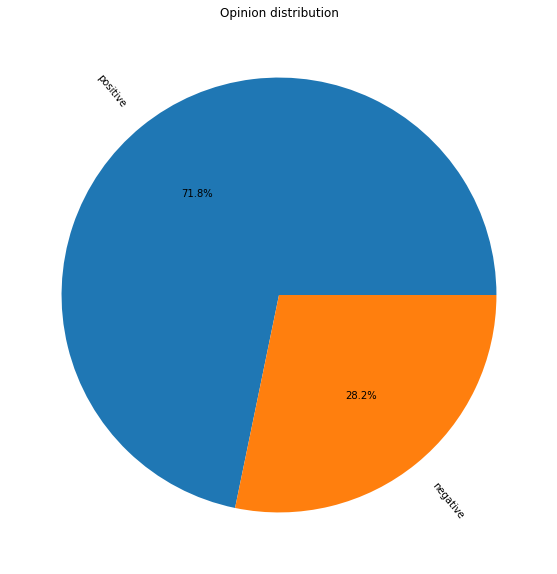

In [61]:
target_counts = df['positiveOpinion'].value_counts()
target_labels = ['positive', 'negative']
title = 'Opinion distribution'
pie_plot_distribution(data = target_counts, labels = target_labels, title =title)

Powyższy diagram pokazuje, że większość - 71,8% - opinii są pozytywne

# Rozkład ocen opinii

Dla lepszej analizy możemy również zbadać podział opinii bardziej szczegółowo, czyli rozkład opinii według ocen klientów

In [62]:
df['score'].value_counts()

5.0    30018
4.0    17572
1.0    14618
3.0     8659
2.0     7516
Name: score, dtype: int64

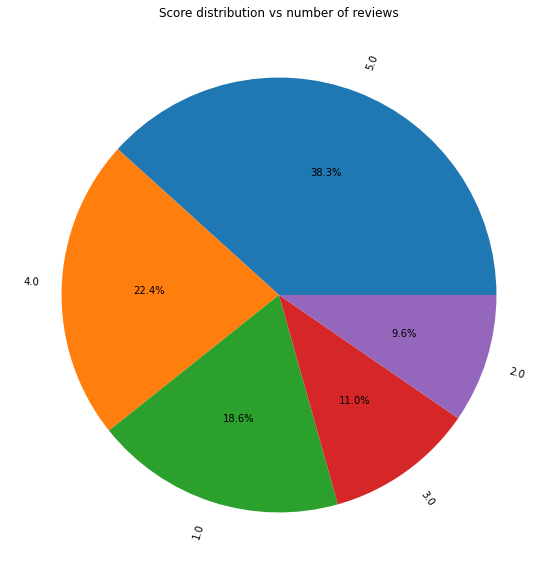

In [64]:
target_counts = df['score'].value_counts()
target_labels = ['5.0','4.0','1.0','3.0','2.0']
title = 'Score distribution vs number of reviews'
pie_plot_distribution(data = target_counts, labels = target_labels, title =title )

Widać, że zdecydowanie większość (38.3%) śa oceny 5.0, <
br>na drugim miejscu 22.4% są opinię 4.0, 
<br>na trzecim 18.6% 1.0, 
<br>na czwartym 11.0% 3.0 
<br>i na końcu 9.6% 2.0

# Rozkład danych helpfulness

Wartym uwagi będzie zbadanie rozkładu opinii użytkowników na przydatność tych opinii

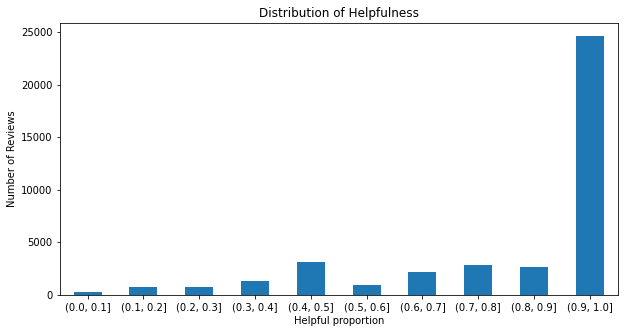

In [120]:
plt.figure(figsize=(10,5))

cuts = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
group_help_ratio = df.groupby([pd.cut(df['procent_help'], 
                                      bins = cuts)]).size()

group_help_ratio.plot(kind='bar')
plt.title("Distribution of Helpfulness")
plt.xlabel("Helpful proportion")
plt.xticks(rotation=0)
plt.ylabel("Number of Reviews")
plt.show()

Z diagramu można wywnioskować, że zdecydowana większość opinii okazały się korzystne dla klientów (są w przedziale [0.9,1.0] )

# Rozkład produktów

Zbadamy top-10 produktów według liczby występowań w opniach

Poniższa funkcja przyjmuje pd.Series i zwraca pierwsze 10 największych wartości razem z sumą pozostałych wartości, zapisanych jako 'other'

In [66]:
def top_n_products(series, n) -> pd.Series: # n - liczba produktów
    if n > len(series): # jeśli liczba n jest większa, niż len(series), zwracamy None
        return None
    else:
        series = series.sort_values(ascending=False) #sortujemy series by na początku był największe wartości
        other = series[n:].sum() # produkty po pozycji n są zbierane razem dla ułatwienia analizy
        series = series[:n]
        series.loc['Other'] = other
        return series

Wyliczamy liczbę występowań tytułów produktów

In [77]:
products_num = df.groupby(['title'],sort=False)['productId'].count() 

In [78]:
products_num

title
Mobile Action MA730 Handset Manager - Bluetooth Data Suite                                                                                                                                        3
USB Data Cable for Sony-Ericsson Z600, Z500, Z200, S700, P900, P802, P800, K700, T637, T630,T628, T618, T616, T610, T316, T310, T237, T226, T68i, T68, T62u, T39, R380 + Internet + Driver CD     9
Motorola HT820 Stereo Bluetooth Headset with microphone , Wireless , 12 hours Music                                                                                                               5
Belkin Executive Leather Case handheld carrying case ( F8D0402 )                                                                                                                                  1
Samsung T809 M620 i607 U420 A303 A717 Car Charger CAD300MBEB                                                                                                                                      4
              

In [81]:
top_10_products = top_n_products(products_num,10)

In [169]:
top_10_products

title
Plantronics Voyager 510 Bluetooth Headset [Retail Packaging]                                                                     3443
Motorola HS850 Bluetooth Headset (Color Sent Based on Availability. Comes in Black, Blue and Grey, or Silver)[Bulk Packaged]      984
Samsung WEP200 Bluetooth Wireless Phones Headset - Retail Packaging - Black                                                       848
Motorola H700 Bluetooth Headset [Motorola Retail Packaging]                                                                       628
Jawbone Noise Shield Bluetooth Headset (Black) [Retail Packaged]                                                                  623
Motorola MOTOROKR S9 Bluetooth Active Headphones (Red,Black) [Retail Packaging]                                                   558
Coby CA-747 Dual Position CD/MD/MP3 Cassette Adapter                                                                              528
BlueAnt Supertooth Light Bluetooth Speakerphone (Black) 

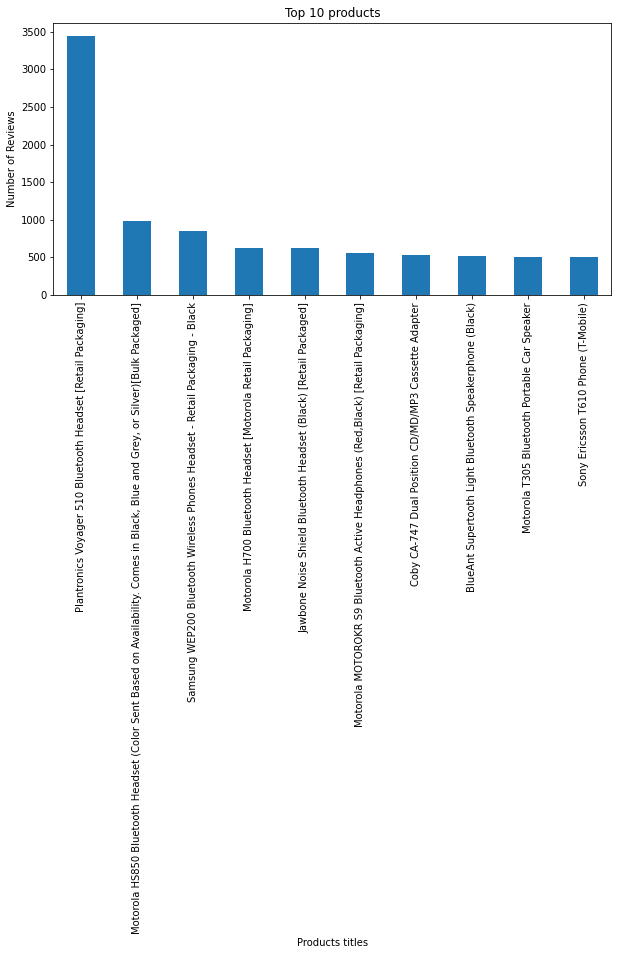

In [87]:
data = top_10_products[:10] #[:10] - bez Other
target_labels = top_10_products.index[:10]
title = "Top 10 products"
x_labels = "Products titles"
y_labels = "Number of Reviews"

bar_plot_distribution(data = data, x_label = x_labels, y_label = y_labels, title = title)
        


Według diagramu najczęsciej wspominanym produktem w opiniach (czyli produkt z największą sprzedażą) jest 
<br>Plantronic Voyager 510 Bluetooth Headset[Retail Packaging]. 
<br>Różnica między pierwszym a drugim miejscem wynosi ~2500 

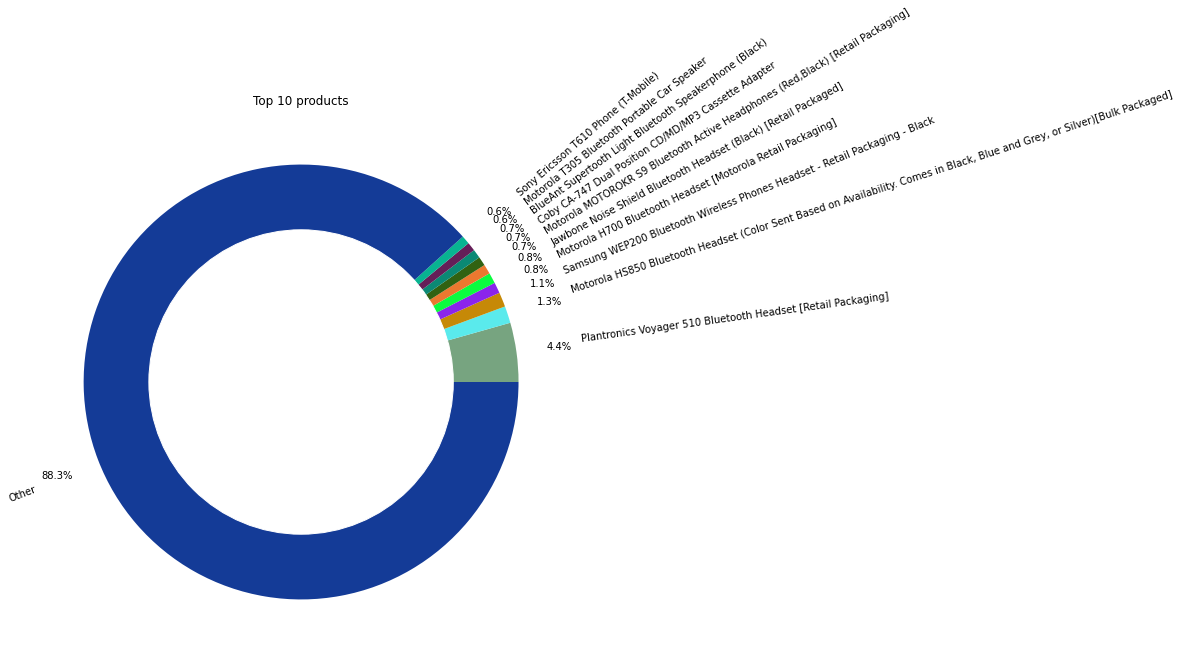

In [177]:
data = top_10_products
labels = top_10_products.index
title = 'Top 10 products'

colors = ['#77a480','#5aeaec',
    '#c68907','#8b24eb',
    '#0bfc3f','#eb782f',
    '#316212','#0b8974',
    '#651e58','#08b491',
    '#143b97']


donut_plot_distribution(data  =data, labels = labels, title = title, colors = colors)

Diagram pączkowy pokazuję stosunek procentowy top-10 produktów do liczby wszystkich produktów

Przydałoby się również dowiedzieć się, jakie produkty najczęściej występują w opiniach pozytywnych i negatywnych

Najpierw stwórzmy dwie kopii danych, pierwsza zawiera same pozytywne opinii, druga - negatywne

Potem wyliczmy liczbę występowań produktów w tych opiniach

In [90]:
df_pos_products = df[df['positiveOpinion'] == 1].copy()
df_neg_products = df[df['positiveOpinion'] == 0].copy()

pos_products = df_pos_products.groupby(['title'], sort=False)['productId'].count()
neg_products = df_neg_products.groupby(['title'], sort=False)['productId'].count()

In [91]:
positive_top_10_products = top_n_products(pos_products, 10)
positive_top_10_products

title
Plantronics Voyager 510 Bluetooth Headset [Retail Packaging]                                                                              3067
Samsung WEP200 Bluetooth Wireless Phones Headset - Retail Packaging - Black                                                                692
Motorola HS850 Bluetooth Headset (Color Sent Based on Availability. Comes in Black, Blue and Grey, or Silver)[Bulk Packaged]               689
Motorola H700 Bluetooth Headset [Motorola Retail Packaging]                                                                                458
BlueAnt Supertooth Light Bluetooth Speakerphone (Black)                                                                                    437
Motorola T305 Bluetooth Portable Car Speaker                                                                                               404
Jawbone Noise Shield Bluetooth Headset (Black) [Retail Packaged]                                                                        

In [92]:
negative_top_10_products = top_n_products(neg_products, 10)
negative_top_10_products

title
Plantronics Voyager 510 Bluetooth Headset [Retail Packaging]                                                                      376
Motorola HS850 Bluetooth Headset (Color Sent Based on Availability. Comes in Black, Blue and Grey, or Silver)[Bulk Packaged]      295
Motorola MOTOROKR S9 Bluetooth Active Headphones (Red,Black) [Retail Packaging]                                                   233
Jawbone Noise Shield Bluetooth Headset (Black) [Retail Packaged]                                                                  220
Sony Ericsson T610 Phone (T-Mobile)                                                                                               189
Motorola H700 Bluetooth Headset [Motorola Retail Packaging]                                                                       170
Coby CA-747 Dual Position CD/MD/MP3 Cassette Adapter                                                                              164
Samsung WEP200 Bluetooth Wireless Phones Headset - Retai

Wyświetlmy dane, używając metody bar_plot_distibution

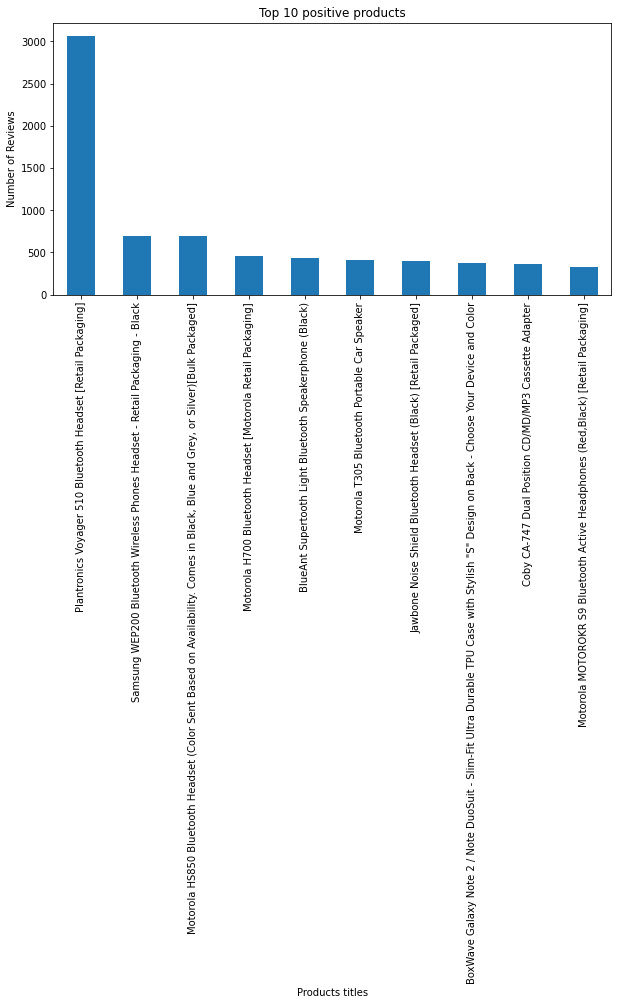

In [93]:
data = positive_top_10_products[:10]
target_labels = positive_top_10_products.index[:10]
title = "Top 10 positive products"
x_labels = "Products titles"
y_labels = "Number of Reviews"

bar_plot_distribution(data = data, x_label = x_labels, y_label = y_labels, title = title)

Na pierwszym miejscu wśród produktów z opinią pozytywną znowu jest ten sam produkt, natomiast na miescju drugim jest <br>Samsung WEP200 Bluetooth Wireless Phones Headset - Retail Packaging - Black<br>który w rankingu wszystkich produktów miał trzecie miejsce. <br>Na miejscu czwartym znajduje się  <br>Motorola HS850 Bluetooth Headset (Color Sent Based on Availability. Comes in Black, Blue and Grey, or Silver)[Bulk Packaged]
<br>Przed ten produkt miał pozycję drugą. 
<br>Wygląda na to, że większoć opinii na ten produkt są negatywne i z pewnością ten produkt będzie zajmował miejsce pierwsze lub drugie w rankingu produktów z opinią negatywną

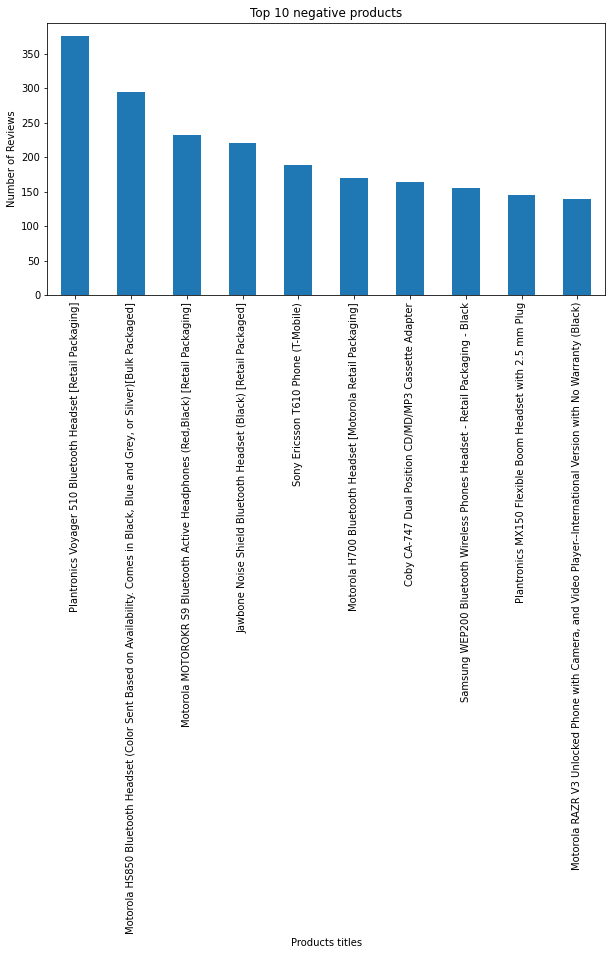

In [95]:
data = negative_top_10_products[:10]
target_labels = negative_top_10_products.index[:10]
title = "Top 10 negative products"
x_labels = "Products titles"
y_labels = "Number of Reviews"

bar_plot_distribution(data = data, x_label = x_labels, y_label = y_labels, title = title)

Jak i oczekiwaliśmy, produkt Motorola zajmuje drugą pozycję w rankingu produktów z opinią negatywną

Niżej przestawione te same wyniki z stosunkiem procentowym do wszystkich produktów z tych kategorii za pomocą wykresów pączkowych

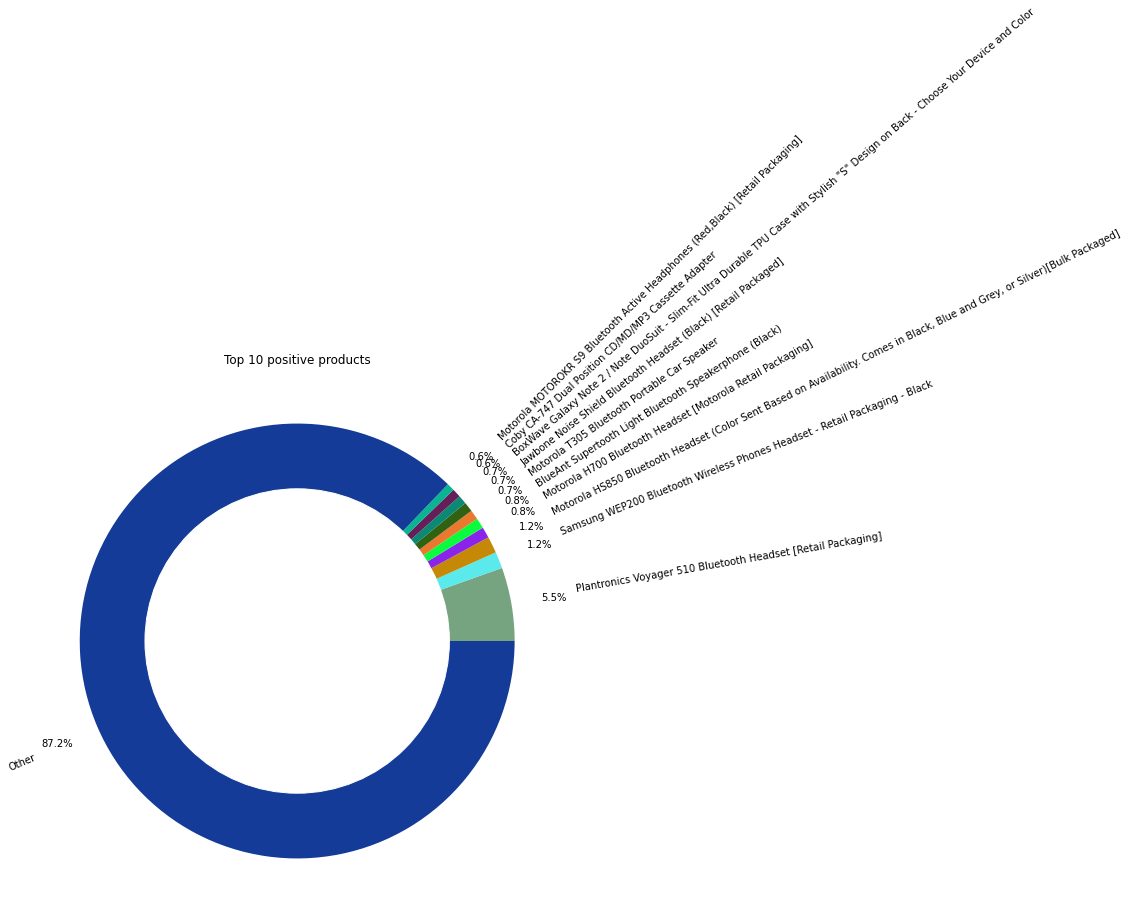

In [179]:
data = positive_top_10_products
labels = positive_top_10_products.index
title = 'Top 10 positive products'
colors = ['#77a480','#5aeaec',
    '#c68907','#8b24eb',
    '#0bfc3f','#eb782f',
    '#316212','#0b8974',
    '#651e58','#08b491',
    '#143b97']

donut_plot_distribution(data  =data, labels = labels, title = title, colors = colors)
    

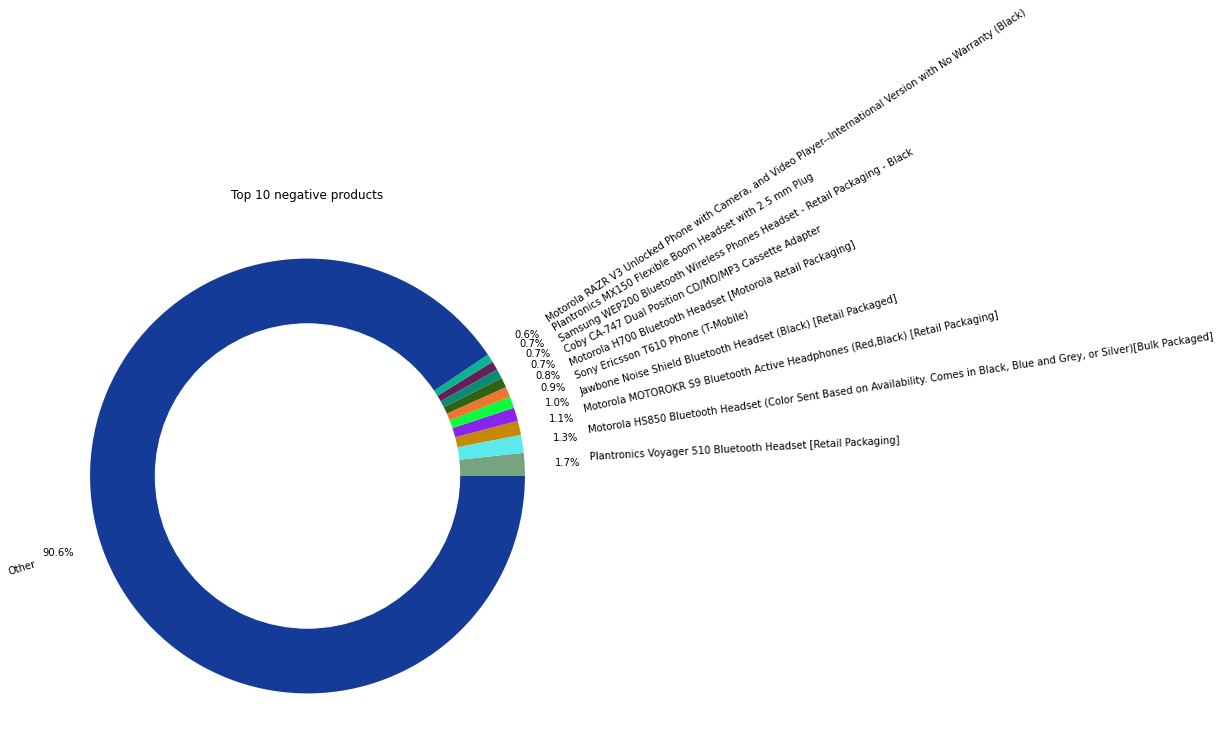

In [180]:
data = negative_top_10_products
labels = negative_top_10_products.index
title = 'Top 10 negative products'

colors = ['#77a480','#5aeaec',
    '#c68907','#8b24eb',
    '#0bfc3f','#eb782f',
    '#316212','#0b8974',
    '#651e58','#08b491',
    '#143b97']

donut_plot_distribution(data = data, labels = labels, title = title, colors = colors)

# Rozkład opinii według lat

Ciekawą informację można wywnioskować również z rozkładu produktów według lat

By móc tę analizę przeprowadzić, musimy stworzyć dodatkową kolumnę, wartość której będzie rokiem, w którym opinia została napisana

Kod napisany poniżej wykrywa za pomocą regex rok i miesiąc z kolumny 'date', dodaje rok do listy i na samym końcu tworzy nową kolumnę 'year'

In [164]:
list_years = []
    
for date in df['date']:
    list_years.append(re.findall("([0-9]*)\-", str(date))[0])
    
df['year'] = list_years

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Obliczamy liczbę występowań lat w naszym zbiorzę danych

In [167]:
product_distr_by_years = df.groupby(['year'])['title'].count()

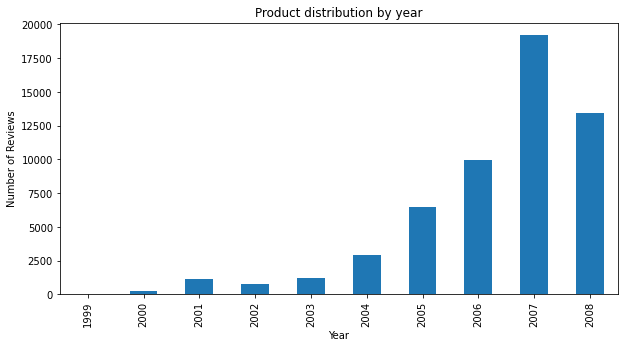

In [168]:
data = product_distr_by_years[:10]
target_labels = product_distr_by_years.index[:10]
title = "Product distribution by year"
x_labels = "Year"
y_labels = "Number of Reviews"

bar_plot_distribution(data = data, x_label = x_labels, y_label = y_labels, title = title)

Według powyższego wykresu widać, że najwięcej opinii było napisano w roku 2007, znacznie mniej w latach 2008, 2006, 2005 itd.

In [182]:
top_product_by_years = df.groupby(['title'])['year'].count()

In [183]:
top_product_by_years

title
"Persia" - Motorola Slvr & Samsung T509 Phone Case                                                                                   1
'da Products LCD Protector                                                                                                           2
'da Protector Model 105 - LCD Protection for digital cameras (see Product Description for list of cameras that this model fits)      1
(2-in-1 Combo) Car Charger + AC/ Wall/ Travel Charger for Palm Zire 22 / Z22                                                         1
(3 Kit) For LG CU400 Cingular Swivel Belt Clip Holster + Car Charger + Travel Charger                                                1
                                                                                                                                  ... 
theBoom Universal Noise Cancelling Cell Phone Headset with Motorola Razr SLVR PEBL adaptors included                                 2
theBoom Universal Noise Cancelling Cell Phone Hea

# Opracowanie tekstu

Dla dalższej analizy danych tekstowych musimy najpierw te dane opracować: - pozbyć się znaków interpunkcyjnych, symboli specjalnych itp.

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [102]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Poniższa funkcja opracowuje dane w sposób następujący: najpierw zmienia wszystkie duże litery na małe

In [103]:
def preprocess(data) -> pd.Series:
    pattern = "[^a-zA-Z]"
    lemmatizer = WordNetLemmatizer()
    result = []
    for txt in data:
        txt = txt.lower()
        txt = re.sub(pattern, " ", txt)
        txt = word_tokenize(txt)
        txt = [lemmatizer.lemmatize(word) for word in txt]
        txt = " ".join(txt)
        result.append(txt)
    return result

In [118]:
df['text_summary']

0        Don't buy! First of all, the company took my m...
1        Mobile Action Bluetooth Mobile Phone Tool Soft...
2        good works real good....a little hard to set u...
3        No instructions included... The price was righ...
4        NOT A DATA CABLE this is NOT a DATA CABLE this...
                               ...                        
78925    great sound quality, good battery life, averag...
78926    Excellent quality at an affordable price I hav...
78927    Sony Ericsson Bluetooth HBH-PV700 Headset - DP...
78928    works great, competitively priced I bought thi...
78929    Sony Ericsson Bluetooth HBH-PV700 Headset I ha...
Name: text_summary, Length: 78383, dtype: object

In [104]:
df['after_preproc_text_summary'] = preprocess(df['text_summary'])

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df['after_preproc_text_summary']

0        don t buy first of all the company took my mon...
1        mobile action bluetooth mobile phone tool soft...
2        good work real good a little hard to set up we...
3        no instruction included the price wa right for...
4        not a data cable this is not a data cable this...
                               ...                        
78925    great sound quality good battery life average ...
78926    excellent quality at an affordable price i hav...
78927    sony ericsson bluetooth hbh pv headset dpy whi...
78928    work great competitively priced i bought this ...
78929    sony ericsson bluetooth hbh pv headset i have ...
Name: after_preproc_text_summary, Length: 78383, dtype: object

Teraz możemy przeanalizować najczęściej używane słowa w opiniach pozytywnych i negatywnych

In [106]:
from wordcloud import WordCloud, STOPWORDS

In [107]:
positive_opinion_df = df[df['positiveOpinion'] == 1]
negative_opinion_df = df[df['positiveOpinion'] == 0]

# Najczęsciej używane słowa w opiniach pozytywnych

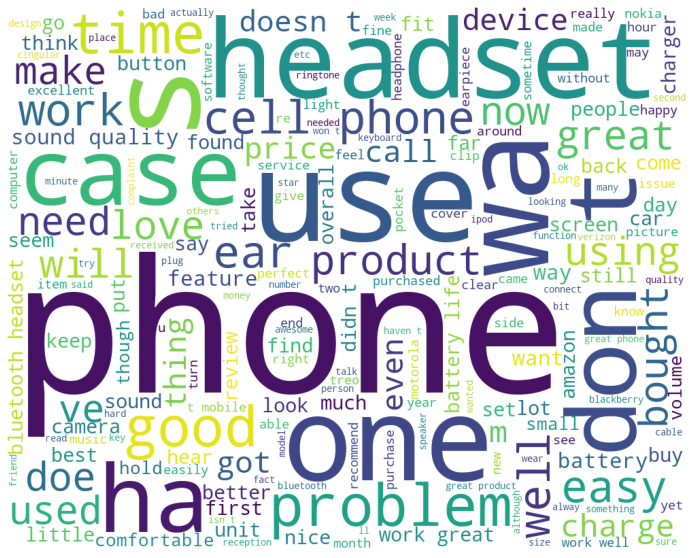

In [108]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(positive_opinion_df['after_preproc_text_summary']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Najczęsciej używane słowa w opiniach negatywnych

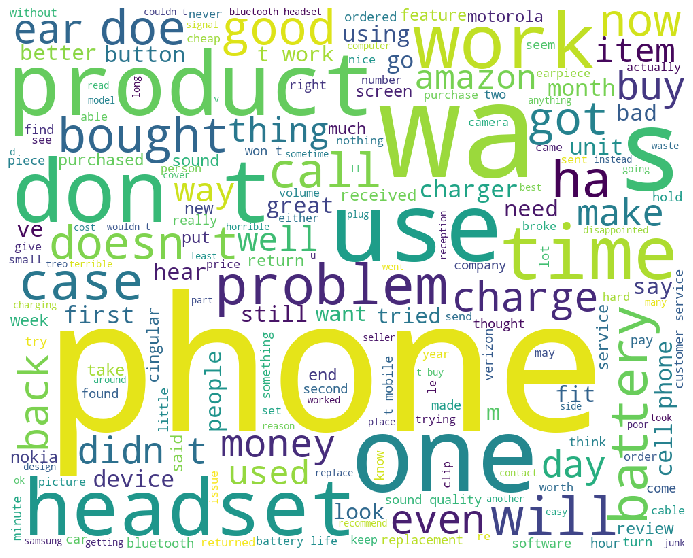

In [62]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(negative_opinion_df['after_preproc_text_summary']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Łatwo zauważyć, że najczęsciej występujące słowa dwóch kategorii są podobne (phone, headset, one)
Możemy spróbować pozbyć się słów, które dużej wartości analitycznej (nazwa produktu), by otrzymać lepsze wyniki

In [136]:
stop_words = ["phone", "headset", "one","product", "was", 'use','ha'] + list(STOPWORDS)

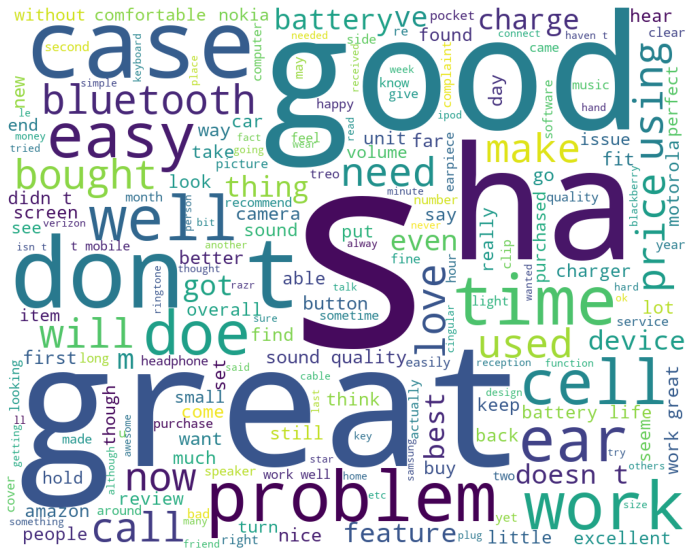

In [116]:
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(positive_opinion_df['after_preproc_text_summary']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Teraz już widać, że w opniach pozytywnych najczęściej używane są słowy great, good don't, problem, easy, work, bluetooth, charge

Można sugerować, że zazwyczaj ludzie piszą o dobrym stanie produktu, łatwości w wykorzystaniu, braku problemów i isrnieniu bluetooth

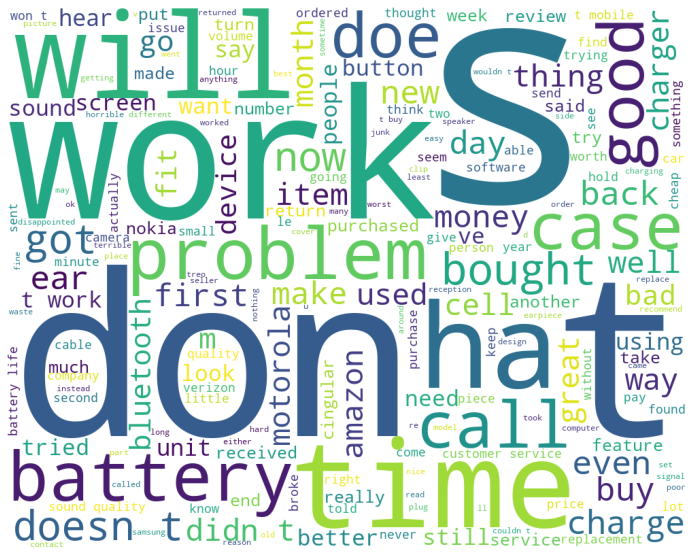

In [117]:
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(negative_opinion_df['after_preproc_text_summary']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

W opiniach negatywnych najczęściej są słowy jak don't, work, battery, problem, charge, doesn't, good

Sugeruję, że najczęściej klienci piszą o tym, że coś nie działa, o problemach z ładowaniem i braku jakości

# Najczęsciej używane słowa w opiniach najkorzystniejszych

Ciekawe będzie się dowiedzieć, co piszą w najkorzystniejszych opiniach

Jako najkorzystniejsze uznamy opinie z korzystnością większą lub równą 80%

In [121]:
most_helpf_df = df[df['procent_help'] >= 0.8]

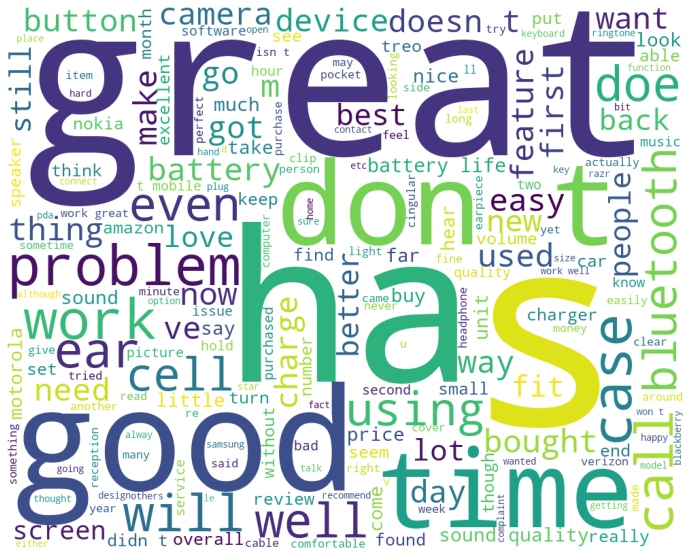

In [122]:
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(most_helpf_df['after_preproc_text_summary']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Łatwo zauważyć, że te słowy są podobne do słów z opinii pozytywnych

# Najczęsciej używane słowa w opiniach mniej korzystniejszych

In [123]:
least_helpf_df = df[df['procent_help'] < 0.8]

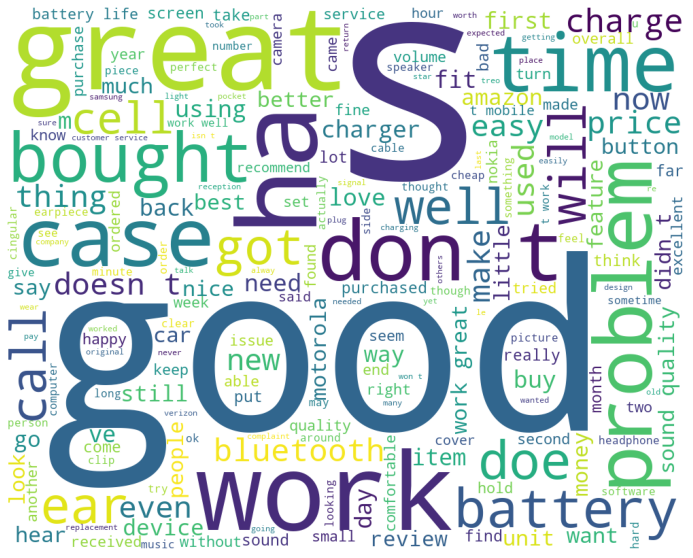

In [124]:
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(least_helpf_df['after_preproc_text_summary']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Te opinię równiesz mają dużo podobnych słów co opinie najkorzystniejsze, jednak widać, że,takie słowy jak problem, work, battery i charge występują więcej, niż w opiniach innej kategorii

Jako dodatkową ciekawą informację, możemy sprawdzić występowanie słów w opniach korzystnych, które mają dużo reakcji(like'ów) ze strony innych klientów

Podczas zakupów klienci z pewnością będą patrzyli więcej na opinie skutecznie, mające jak najwięcej pozytywnych reakcji, niż na opinia rówież skuteczne, z, np., 1 reakcją

Sprawdźmy więc, jakie słowy występują w opiniach mających co najmniej 80% skuteczności I więcej niż 5 pozytywnych informacji zwrotnych

In [185]:
helpf_df = df[(df['procent_help'] >= 0.8) & (df['positiveFeedBack'] >5)]

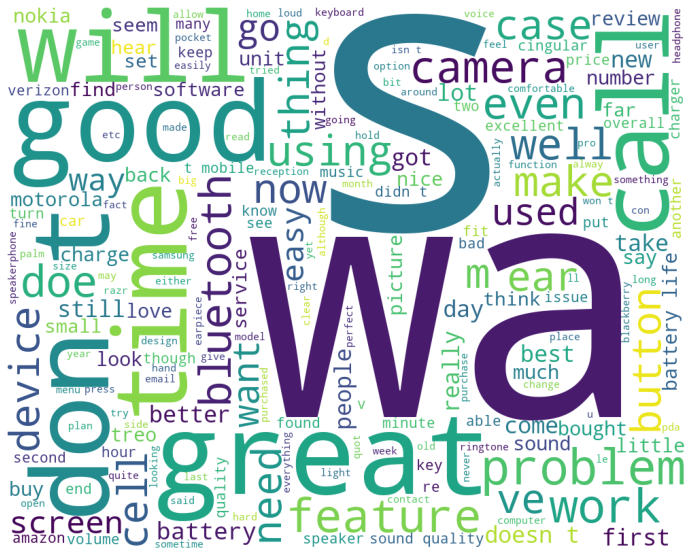

In [186]:
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(helpf_df['after_preproc_text_summary']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Nie udało się znaleźć dużej różnicy w puli słow oprócz dużej liczby użwyań słowa 'wa', które jednak trudno jest zinterpretować